Adopted from https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

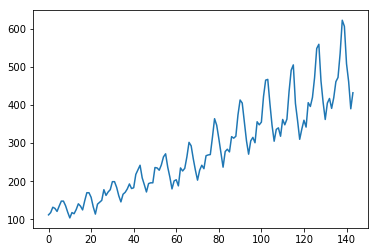

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0413
Epoch 2/100
0s - loss: 0.0202
Epoch 3/100
0s - loss: 0.0146
Epoch 4/100
0s - loss: 0.0131
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0111
Epoch 7/100
0s - loss: 0.0102
Epoch 8/100
0s - loss: 0.0093
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0038
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.92 RMSE
Test Score: 47.53 RMSE


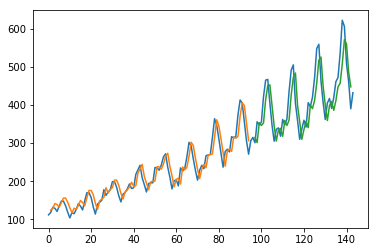

In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression Using the Window Method



In [13]:
# LSTM for international airline passengers problem with window regression framing
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
0s - loss: 0.0542
Epoch 2/100
0s - loss: 0.0258
Epoch 3/100
0s - loss: 0.0167
Epoch 4/100
0s - loss: 0.0145
Epoch 5/100
0s - loss: 0.0129
Epoch 6/100
0s - loss: 0.0116
Epoch 7/100
0s - loss: 0.0104
Epoch 8/100
0s - loss: 0.0094
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0074
Epoch 11/100
0s - loss: 0.0066
Epoch 12/100
0s - loss: 0.0060
Epoch 13/100
0s - loss: 0.0056
Epoch 14/100
0s - loss: 0.0052
Epoch 15/100
0s - loss: 0.0050
Epoch 16/100
0s - loss: 0.0049
Epoch 17/100
0s - loss: 0.0046
Epoch 18/100
0s - loss: 0.0045
Epoch 19/100
0s - loss: 0.0045
Epoch 20/100
0s - loss: 0.0043
Epoch 21/100
0s - loss: 0.0043
Epoch 22/100
0s - loss: 0.0042
Epoch 23/100
0s - loss: 0.0042
Epoch 24/100
0s - loss: 0.0042
Epoch 25/100
0s - loss: 0.0040
Epoch 26/100
0s - loss: 0.0041
Epoch 27/100
0s - loss: 0.0040
Epoch 28/100
0s - loss: 0.0040
Epoch 29/100
0s - loss: 0.0039
Epoch 30/100
0s - loss: 0.0038
Epoch 31/100
0s - loss: 0.0038
Epoch 32/100
0s - loss: 0.0037
Epoch 33/100
0s -

Train Score: 24.19 RMSE
Test Score: 58.05 RMSE


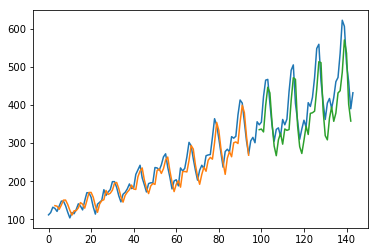

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression with Time Steps



# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [15]:
# LSTM for international airline passengers problem with time step regression framing
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
0s - loss: 0.0285
Epoch 2/100
0s - loss: 0.0117
Epoch 3/100
0s - loss: 0.0097
Epoch 4/100
0s - loss: 0.0086
Epoch 5/100
0s - loss: 0.0074
Epoch 6/100
0s - loss: 0.0065
Epoch 7/100
0s - loss: 0.0058
Epoch 8/100
0s - loss: 0.0053
Epoch 9/100
0s - loss: 0.0045
Epoch 10/100
0s - loss: 0.0044
Epoch 11/100
0s - loss: 0.0041
Epoch 12/100
0s - loss: 0.0041
Epoch 13/100
0s - loss: 0.0040
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0039
Epoch 16/100
0s - loss: 0.0039
Epoch 17/100
0s - loss: 0.0038
Epoch 18/100
0s - loss: 0.0039
Epoch 19/100
0s - loss: 0.0038
Epoch 20/100
0s - loss: 0.0038
Epoch 21/100
0s - loss: 0.0038
Epoch 22/100
0s - loss: 0.0038
Epoch 23/100
0s - loss: 0.0037
Epoch 24/100
0s - loss: 0.0038
Epoch 25/100
0s - loss: 0.0037
Epoch 26/100
0s - loss: 0.0038
Epoch 27/100
0s - loss: 0.0037
Epoch 28/100
0s - loss: 0.0038
Epoch 29/100
0s - loss: 0.0037
Epoch 30/100
0s - loss: 0.0036
Epoch 31/100
0s - loss: 0.0037
Epoch 32/100
0s - loss: 0.0036
Epoch 33/100
0s -

Train Score: 23.70 RMSE
Test Score: 58.94 RMSE


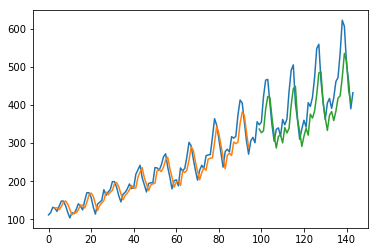

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM with Memory Between Batches



In [17]:
# LSTM for international airline passengers problem with memory
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()


Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0083
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0031
Epoch 1/1
0s - loss: 0.0030
Epoch 1/1
0s - loss: 0.0029
Epoch 1/1
0s - loss: 0.0028
Epoch 1/1
0s - loss: 0.0028
Epoch 1/1
0s - loss: 0.0027
Epoch 1/1
0s - loss: 0.0027
Epoch 1/1
0s - loss:

Train Score: 20.74 RMSE
Test Score: 52.23 RMSE


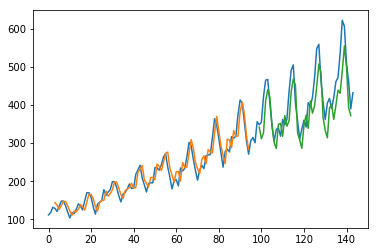

In [18]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs with Memory Between Batches



In [19]:
# Stacked LSTM for international airline passengers problem with memory
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()


Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0141
Epoch 1/1
0s - loss: 0.0099
Epoch 1/1
0s - loss: 0.0072
Epoch 1/1
0s - loss: 0.0060
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss:

Train Score: 20.49 RMSE
Test Score: 56.21 RMSE


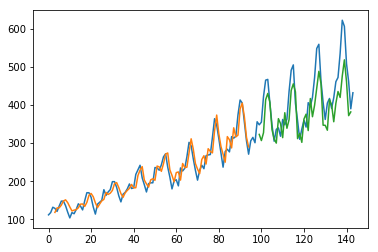

In [20]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()